In [78]:
import gpxpy
import gpxpy.gpx
import geopy.distance

import pandas as pd
import matplotlib.pyplot as plt

In [79]:
from platform import python_version
print(python_version())

3.9.15


In [80]:
with open('/Users/arbatov/Downloads/Morning_Run.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [4]:
gpx.get_track_points_no()

4119

In [5]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=11.3, maximum=22.3)

In [7]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=30.799999999999997, downhill=34.89999999999998)

In [9]:
gpx.get_time_bounds()

TimeBounds(start_time=datetime.datetime(2022, 12, 25, 23, 2, 31, tzinfo=SimpleTZ("Z")), end_time=datetime.datetime(2022, 12, 26, 0, 11, 13, tzinfo=SimpleTZ("Z")))

In [11]:
moving_data = gpx.get_moving_data()

In [13]:
moving_data.moving_time

4015.0

In [14]:
moving_data.stopped_time

13.0

In [16]:
moving_data.max_speed

4.184236316253756

In [85]:
sampling = 20

route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for i, point in enumerate(segment.points[::sampling]):
            previous_point = segment.points[i - 1]
            route_info.append({
                'time': point.time,
                'time_delta': point.time_difference(previous_point),
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation,
                'speed': point.speed_between(previous_point),
                'distance': geopy.distance.geodesic(
                    (point.latitude, point.longitude), 
                    (previous_point.latitude, previous_point.longitude)
                ).m
            })
            
route_df = pd.DataFrame(route_info)
route_df['time'] = pd.to_datetime(route_df['time']).map(lambda x: x.tz_convert('Asia/Singapore'))

route_df.head(100)

,time,time_delta,latitude,longitude,elevation,speed,distance
0,2022-12-26 07:02:31+08:00,4122.0,1.309652,103.896760,16.3,0.028399,116.889374
1,2022-12-26 07:02:51+08:00,20.0,1.309792,103.897140,16.3,2.253529,45.034716
2,2022-12-26 07:03:11+08:00,39.0,1.309462,103.897707,15.2,2.756385,107.465831
3,2022-12-26 07:03:31+08:00,58.0,1.308737,103.898115,15.2,3.124273,180.825357
4,2022-12-26 07:03:51+08:00,77.0,1.308112,103.898427,15.2,3.259733,250.221296
...,...,...,...,...,...,...,...
95,2022-12-26 07:34:11+08:00,1806.0,1.302278,103.918553,15.2,1.273695,2299.224738
96,2022-12-26 07:34:31+08:00,1825.0,1.302102,103.917930,15.2,1.225231,2234.885177
97,2022-12-26 07:34:51+08:00,1844.0,1.301985,103.917343,15.2,1.179283,2173.366199
98,2022-12-26 07:35:11+08:00,1863.0,1.301813,103.916732,15.2,1.134629,2112.483566


<AxesSubplot:xlabel='time'>

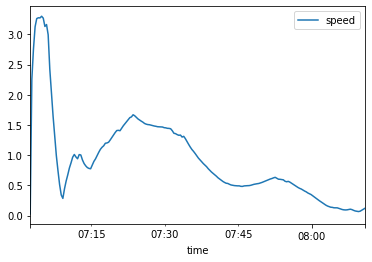

In [86]:
route_df.plot('time', 'speed')

<AxesSubplot:xlabel='time'>

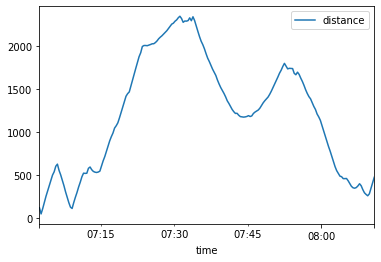

In [87]:
route_df.plot('time', 'distance')

<AxesSubplot:xlabel='time'>

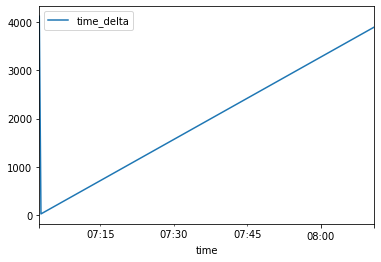

In [88]:
route_df.plot('time', 'time_delta')